* Bibliotecas:

In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: c:\Users\micae\.pyenv\pyenv-win\versions\3.12.1\python.exe -m pip install --upgrade pip


In [13]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.2 kB 487.6 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.2 kB 845.5 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: c:\Users\micae\.pyenv\pyenv-win\versions\3.12.1\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from wordcloud import WordCloud

* Leitura dos dados:

In [3]:
dados = pd.read_csv('teste_atualizado.csv')

In [4]:
dados.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0000-00-00,0.72,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


## Perguntas de Partida e Hipóteses:

1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
3. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

## Resolução das Perguntas

* **1ª Pergunta**: Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [8]:
media_por_bairro = dados.groupby('bairro_group').agg({
    'price': 'mean',
    'disponibilidade_365': 'mean',
    'numero_de_reviews': 'sum'
}).reset_index()

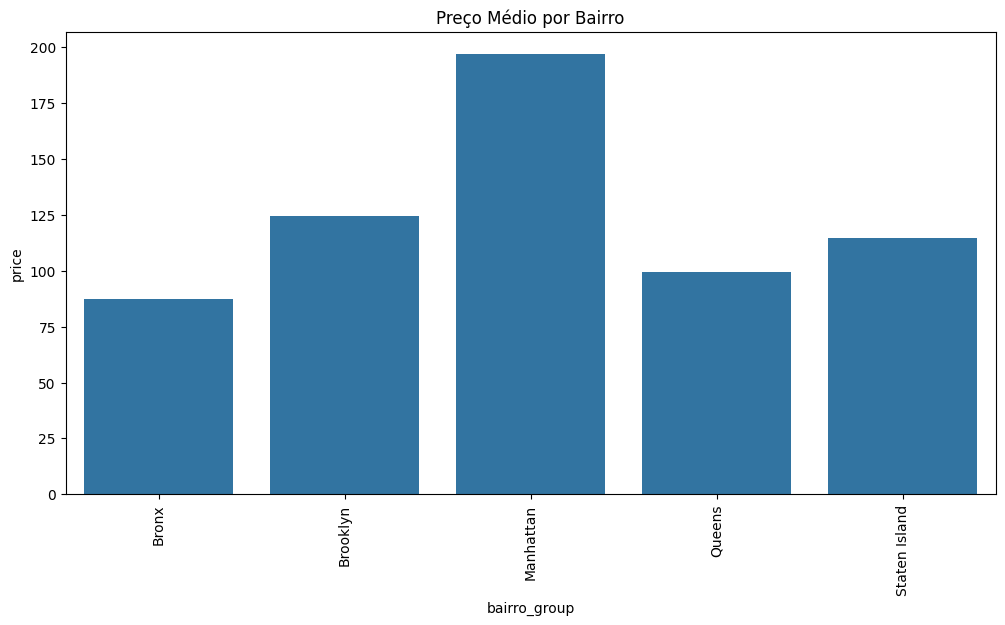

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(data=media_por_bairro, x='bairro_group', y='price')
plt.title('Preço Médio por Bairro')
plt.xticks(rotation=90)
plt.show()

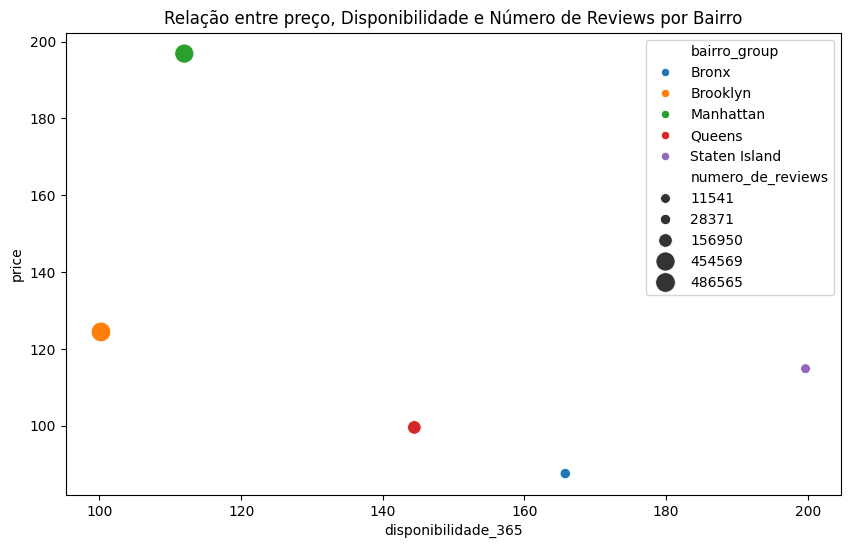

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=media_por_bairro, x='disponibilidade_365', y='price', hue='bairro_group', size='numero_de_reviews', sizes=(50,200))
plt.title('Relação entre preço, Disponibilidade e Número de Reviews por Bairro')
plt.show()

* **2ª Pergunta**: O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

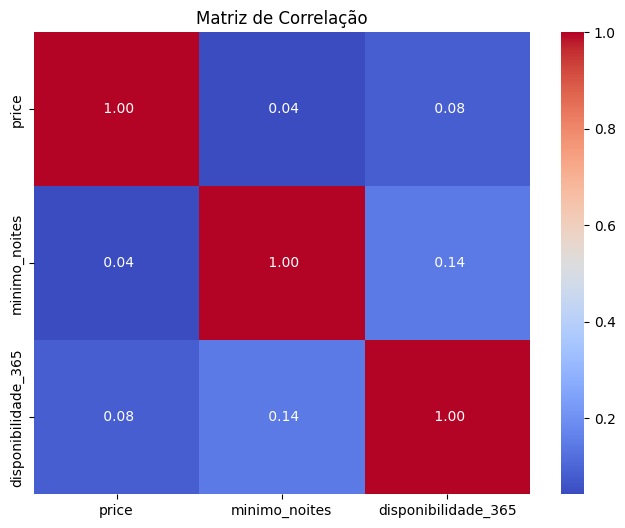

In [12]:
correlacao = dados[['price','minimo_noites','disponibilidade_365']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=' .2f')
plt.title('Matriz de Correlação')
plt.show()

3. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [15]:
alto_valor = dados[dados['price']> dados['price'].mean()]

In [16]:
texto = ' '.join(alto_valor['nome'])

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

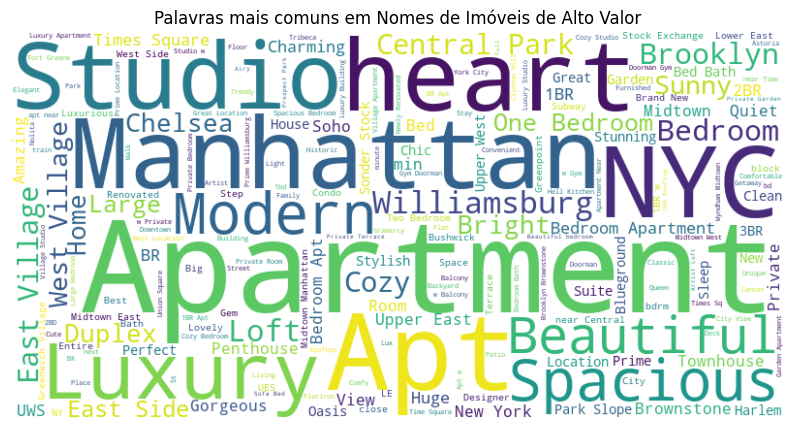

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais comuns em Nomes de Imóveis de Alto Valor')
plt.show()

In [20]:
palavras_chave = ['Studio','heart','Manhattan','NYC','Modern','Apartment','Apt','Luxury','Beautiful','Spacious']

In [21]:
for palavra in palavras_chave:
    dados[palavra] = dados['nome'].str.contains(palavra, case=False)

In [23]:
for palavra in palavras_chave:
    print(f"Preço médio para imóveis com '{palavra}': {dados[dados[palavra]]['price'].mean():.2f}")
    print(f"Preço médio para imóveis sem '{palavra}': {dados[~dados[palavra]]['price'].mean():.2f}")

Preço médio para imóveis com 'Studio': 153.13
Preço médio para imóveis sem 'Studio': 152.68
Preço médio para imóveis com 'heart': 162.25
Preço médio para imóveis sem 'heart': 152.30
Preço médio para imóveis com 'Manhattan': 149.79
Preço médio para imóveis sem 'Manhattan': 152.95
Preço médio para imóveis com 'NYC': 173.44
Preço médio para imóveis sem 'NYC': 151.69
Preço médio para imóveis com 'Modern': 168.49
Preço médio para imóveis sem 'Modern': 152.10
Preço médio para imóveis com 'Apartment': 154.60
Preço médio para imóveis sem 'Apartment': 152.42
Preço médio para imóveis com 'Apt': 165.74
Preço médio para imóveis sem 'Apt': 151.31
Preço médio para imóveis com 'Luxury': 271.57
Preço médio para imóveis sem 'Luxury': 148.39
Preço médio para imóveis com 'Beautiful': 153.34
Preço médio para imóveis sem 'Beautiful': 152.69
Preço médio para imóveis com 'Spacious': 139.31
Preço médio para imóveis sem 'Spacious': 153.85


4. Qual a média de Preço por tipo de quarto:

In [25]:
media_por_tipo = dados.groupby('room_type')['price'].mean().reset_index()

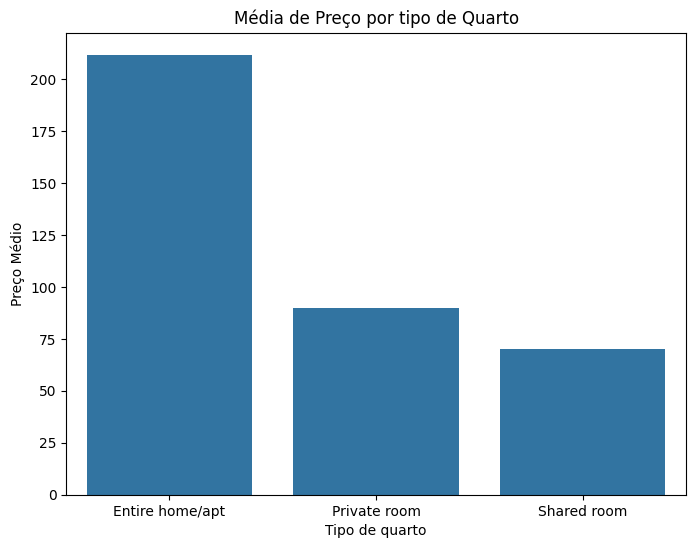

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=media_por_tipo, x='room_type', y='price')
plt.title('Média de Preço por tipo de Quarto')
plt.xlabel('Tipo de quarto')
plt.ylabel('Preço Médio')
plt.show()

5. Qual é a distribuição dos preços dos imóveis? Existem outliers?

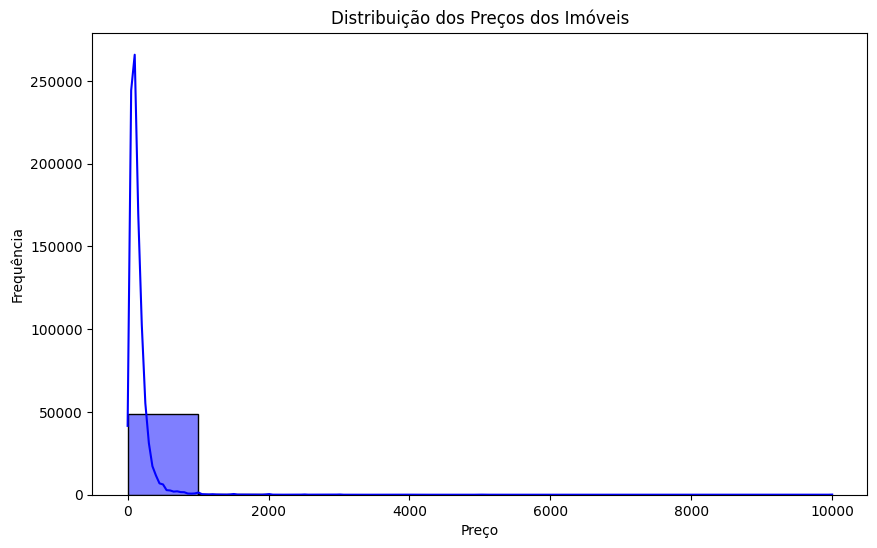

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(dados['price'], bins=10, kde=True, color='blue')
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

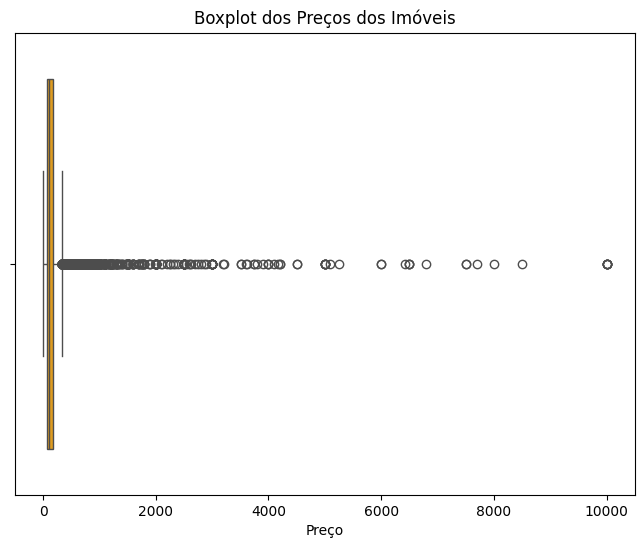

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dados['price'], color='orange')
plt.title('Boxplot dos Preços dos Imóveis')
plt.xlabel('Preço')
plt.show()